In [ ]:
 !nvidia-smi

Thu May 19 22:09:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset, DataLoader, Subset
# from torchvision.datasets import ImageFolder
from PIL import Image
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape
from keras import backend as K
from keras.callbacks import History 

from keras.layers import AveragePooling2D
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
import tensorflow as tf

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id = 'datasci-kalampree'
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list

!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

!apt -qq update

!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  79281      0 --:--:-- --:--:-- --:--:-- 76878
OK
47 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 47 not upgraded.
Need to get 11.5 MB of archives.
After this operation, 27.2 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.41.1_amd64.deb ...
Unpacking gcsfuse (0.41.1) ...
Setting up gcsfuse (0.41.1) ...


In [ ]:
!mkdir colab_directory

!gcsfuse --implicit-dirs datasci-kalampree colab_directory

2022/05/19 21:32:09.500273 Start gcsfuse/0.41.1 (Go version go1.17.6) for app "" using mount point: /content/colab_directory
2022/05/19 21:32:09.512944 Opening GCS connection...
2022/05/19 21:32:10.512118 Mounting file system "datasci-kalampree"...
2022/05/19 21:32:10.514527 File system has been successfully mounted.


In [ ]:
!wget -O rainnet_weights.h5 https://zenodo.org/record/3630429/files/rainnet_weights.h5?download=1

--2022-05-19 18:59:33--  https://zenodo.org/record/3630429/files/rainnet_weights.h5?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125617184 (120M) [application/octet-stream]
Saving to: ‘rainnet_weights.h5’

rainnet_weights.h5  100%[===================>] 119.80M  2.73MB/s    in 26s     

2022-05-19 19:00:01 (4.65 MB/s) - ‘rainnet_weights.h5’ saved [125617184/125617184]



In [ ]:
!mkdir bkk_radar_images_all

In [ ]:
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_1.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_2.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_3.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_4.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_5.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_6.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_7.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_8.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_9.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_10.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_11.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_12.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_13.zip" -d "/content/bkk_radar_images_all/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622777542.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622778148.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622778434.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622779338.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622780250.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622780848.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622781134.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622781740.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622782042.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622782936.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622784150.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/162278

In [ ]:
from distutils.dir_util import copy_tree, remove_tree
for i in range(1,14):
  print(i)
  copy_tree(f"/content/bkk_radar_images_all/bkk_radar_images_{i}", "/content/bkk_radar_images_all")
  remove_tree(f"/content/bkk_radar_images_all/bkk_radar_images_{i}")

1
2
3
4
5
6
7
8
9
10
11
12
13


# Dataset

In [ ]:
def Scaler(array):
    return np.log(array+0.01)


def invScaler(array):
    return np.exp(array) - 0.01


def pad_to_shape(array, from_shape=900, to_shape=928, how="mirror"):
    # calculate how much to pad in respect with native resolution
    padding = int( (to_shape - from_shape) / 2)
    # for input shape as (batch, W, H, channels)
    if how == "zero":
        array_padded = np.pad(array, ((0,0),(padding,padding),(padding,padding),(0,0)), mode="constant", constant_values=0)
    elif how == "mirror":
        array_padded = np.pad(array, ((0,0),(padding,padding),(padding,padding),(0,0)), mode="reflect")
    return array_padded


def pred_to_rad(pred, from_shape=928, to_shape=900):
    # pred shape 12,928,928
    padding = int( (from_shape - to_shape) / 2)
    return pred[::, padding:padding+to_shape, padding:padding+to_shape].copy()


def data_preprocessing(X):
    
    # 0. Right shape for batch
    X = np.moveaxis(X, 0, -1)
    X = X[np.newaxis, ::, ::, ::]
    # 1. To log scale
    X = Scaler(X)
    # 2. from 900x900 to 928x928
    X = pad_to_shape(X)
    
    return X


def data_postprocessing(nwcst):
    
    # 0. Squeeze empty dimensions
    nwcst = np.squeeze(np.array(nwcst))
    # 1. Convert back to rainfall depth
    nwcst = invScaler(nwcst)
    # 2. Convert from 928x928 back to 900x900
    # nwcst = pred_to_rad(nwcst)
    # 3. Return only positive values
    nwcst = np.where(nwcst>0, nwcst, 0)
    return nwcst

def prediction(model_instance, input_data, lead_time=12):
    
    input_data = data_preprocessing(input_data)
    
    nwcst = []

    for _ in range(lead_time):
        # make prediction
        pred = model_instance.predict(input_data)
        # append prediction to holder
        nwcst.append(pred)
        # append prediction to the input shifted on one step ahead
        input_data = np.concatenate([input_data[::, ::, ::, 1:], pred], axis=-1)
    
    nwcst = data_postprocessing(nwcst)
    
    return nwcst

In [ ]:
class RainDataset(tf.keras.utils.Sequence):
    """Rain dataset."""

    def __init__(self,  root_dir,csv_path, step_in=4,step_out=1,batch_size=1,transform=None):

        df = df = pd.read_csv(csv_path,header=None,delimiter=',')
        image_names = []
        for i in range(df.shape[1]):
          image_names.append(df.iloc[0][i].strip("'"))
        self.total_imgs = image_names
        self.root_dir = root_dir
        self.transform = transform        
        self.step_in = step_in
        self.step_out = step_out
        self.batch_size = batch_size
        self.raw_images = []
        for i in range(len(self.total_imgs)):
          name = self.total_imgs[i]
          img = cv2.imread(f"{self.root_dir}/{name}",0)
          img = cv2.resize(img, (928,928)) 
          img = img.astype('float32')
          img = img /255
          print(f"{name} is appended")
          self.raw_images.append(img)

    def __len__(self):
        return (len(self.total_imgs) - (self.step_in + self.step_out))//self.batch_size

    def get_index(self,idx):
     
        tmp_batch = []
        tmp_imgs = self.raw_images[idx:idx+self.step_in+self.step_out]
           
        tmp_imgs = np.array(tmp_imgs)
        tmp_imgs = Scaler(tmp_imgs)
        
        
 
        X = tmp_imgs[:self.step_in,:,:]
        
        y = tmp_imgs[self.step_in:,:,:]
        X = np.rollaxis(X, 0, 3)  
        y = np.rollaxis(y, 0, 3)  
        # print(X.shape)
        # print(y.shape)
        return X.astype('float32'),y.astype('float32')


    def __getitem__(self, idx):
        X = []
        Y = []

        for i in range(idx*self.batch_size,(idx+1)*self.batch_size):
          x,y = self.get_index(i)
          X.append(x[:])
          Y.append(y[:])
        X = np.array(X)
        Y = np.array(Y)
        return X,Y

In [ ]:
train_rain_dataset = RainDataset('/content/bkk_radar_images_all','/content/drive/Shareddrives/Datasci/train3_image_names.csv',step_in=4,step_out=1,batch_size=1)
val_rain_dataset = RainDataset('/content/bkk_radar_images_all','/content/drive/Shareddrives/Datasci/val3_image_names.csv',step_in=4,step_out=1,batch_size=1)

1592461954.png is appended
1592462136.png is appended
1592462768.png is appended
1592463068.png is appended
1592463277.png is appended
1592463664.png is appended
1592463902.png is appended
1592464205.png is appended
1592464698.png is appended
1592465153.png is appended
1592465454.png is appended
1592466058.png is appended
1592466359.png is appended
1592466963.png is appended
1592467265.png is appended
1592467566.png is appended
1592467868.png is appended
1592468170.png is appended
1592468472.png is appended
1592468774.png is appended
1592469378.png is appended
1592469680.png is appended
1592469982.png is appended
1592470283.png is appended
1592470585.png is appended
1592470886.png is appended
1592471188.png is appended
1592471489.png is appended
1592471791.png is appended
1592472394.png is appended
1592472697.png is appended
1592472999.png is appended
1592473300.png is appended
1592473601.png is appended
1592473903.png is appended
1592474205.png is appended
1592474507.png is appended
1

In [ ]:
print(len(train_rain_dataset))
print(len(val_rain_dataset))

In [ ]:
train_rain_dataset[0][0].shape

In [ ]:
X, y = train_rain_dataset[3]

In [ ]:
X[0][:,:,1].shape

In [ ]:
plt.imshow(X[0][:,:,1])
plt.show()

# Model

In [ ]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

def rainnet(input_shape=(928, 928, 4), mode="regression"):

    """
    The function for building the RainNet (v1.0) model from scratch
    using Keras functional API.
    Parameters:
    input size: tuple(W x H x C), where W (width) and H (height)
    describe spatial dimensions of input data (e.g., 928x928 for RY data);
    and C (channels) describes temporal (depth) dimension of 
    input data (e.g., 4 means accounting four latest radar scans at time
    t-15, t-10, t-5 minutes, and t)
    
    mode: "regression" (default) or "segmentation". 
    For "regression" mode the last activation function is linear, 
    while for "segmentation" it is sigmoid.
    To train RainNet to predict continuous precipitation intensities use 
    "regression" mode. 
    RainNet could be trained to predict the exceedance of specific intensity 
    thresholds. For that purpose, use "segmentation" mode.
    """

    inputs = Input(input_shape)

    conv1f = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(inputs)
    conv1f = Activation("relu")(conv1f)
    conv1s = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(conv1f)
    conv1s = Activation("relu")(conv1s)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1s)

    conv2f = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(pool1)
    conv2f = Activation("relu")(conv2f)
    conv2s = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(conv2f)
    conv2s = Activation("relu")(conv2s)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2s)

    conv3f = Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(pool2)
    conv3f = Activation("relu")(conv3f)
    conv3s = Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(conv3f)
    conv3s = Activation("relu")(conv3s)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3s)

    conv4f = Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(pool3)
    conv4f = Activation("relu")(conv4f)
    conv4s = Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(conv4f)
    conv4s = Activation("relu")(conv4s)
    drop4 = Dropout(0.5)(conv4s)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5f = Conv2D(1024, 3, padding='same', kernel_initializer='he_normal')(pool4)
    conv5f = Activation("relu")(conv5f)
    conv5s = Conv2D(1024, 3, padding='same', kernel_initializer='he_normal')(conv5f)
    conv5s = Activation("relu")(conv5s)
    drop5 = Dropout(0.5)(conv5s)

    up6 = concatenate([UpSampling2D(size=(2, 2))(drop5), conv4s], axis=3)
    conv6 = Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(up6)
    conv6 = Activation("relu")(conv6)
    conv6 = Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(conv6)
    conv6 = Activation("relu")(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3s], axis=3)
    conv7 = Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(up7)
    conv7 = Activation("relu")(conv7)
    conv7 = Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(conv7)
    conv7 = Activation("relu")(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2s], axis=3)
    conv8 = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(up8)
    conv8 = Activation("relu")(conv8)
    conv8 = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(conv8)
    conv8 = Activation("relu")(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1s], axis=3)
    conv9 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(up9)
    conv9 = Activation("relu")(conv9)
    conv9 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Activation("relu")(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    
    if mode == "regression":
        outputs = Conv2D(1, 1, activation='linear')(conv9)
    elif mode == "segmentation":
        outputs = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
model = rainnet()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=3e-4),loss='log_cosh')

In [ ]:
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,
    show_layer_names=True,)

In [ ]:
model.load_weights("/content/drive/Shareddrives/Datasci/rainnet_2.h5")

In [ ]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Datasci/weights.{epoch:02d}-{val_loss:.2f}.h5',
    monitor='val_loss"',
    mode='max',
    save_best_only=True)

In [ ]:
cb_list = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3),model_checkpoint_callback]

In [ ]:
history = model.fit(x=train_rain_dataset,validation_data=val_rain_dataset,epochs=5,verbose=1,callbacks=cb_list)

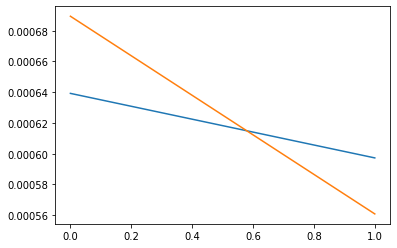

In [ ]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(history.history["val_loss"])
ax1.plot(history.history["loss"])

In [ ]:
model.save_weights('/content/drive/Shareddrives/Datasci/rainnet_3.h5')

In [ ]:
X,y = train_rain_dataset[0]

In [ ]:
y_pred = model.predict(X)

In [ ]:
def cal_mse(y,y_red):
  return np.square(np.subtract(y,y_pred)).mean()

In [ ]:
cal_mse(y,y_pred)

0.0004646171

In [ ]:
def visulize_output(img):
  img = invScaler(img)
  # img = img * 25/5
  # img = np.where(img>0, img, 0)
  plt.imshow(img)
  plt.show()

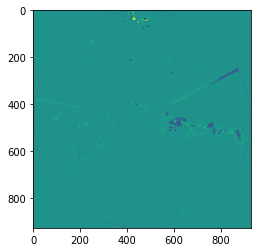

In [ ]:
visulize_output(np.squeeze(y))

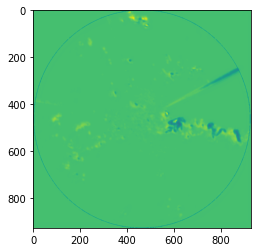

In [ ]:
visulize_output(np.squeeze(y_pred))

# Test model

In [ ]:
test_rain_dataset = RainDataset('/content/bkk_radar_images_all/bkk_radar_images_1','/content/drive/Shareddrives/Datasci/sample_test_image_names.csv',step_in=4,step_out=1,batch_size=1)

1592918492.png is appended
1592918796.png is appended
1592919102.png is appended
1592919700.png is appended
1592919994.png is appended
1592920896.png is appended
1592921192.png is appended
1592921496.png is appended
1592921800.png is appended
1592922094.png is appended
1592922388.png is appended
1592922694.png is appended
1592922998.png is appended
1592923296.png is appended
1592923602.png is appended
1592923896.png is appended
1592924200.png is appended
1592924498.png is appended
1592924802.png is appended
1592925096.png is appended
1592925390.png is appended
1592925694.png is appended
1592925988.png is appended
1592926292.png is appended
1592926596.png is appended
1592926890.png is appended
1592927194.png is appended
1592927500.png is appended
1592927794.png is appended
1592928098.png is appended
1592928392.png is appended
1592928698.png is appended
1592928998.png is appended
1592929294.png is appended
1592929598.png is appended
1592929896.png is appended
1592930190.png is appended
1

In [ ]:
X,y = test_rain_dataset[220]

In [ ]:
y_pred = model.predict(X)

In [ ]:
cal_mse(y,y_pred)

0.0007290208

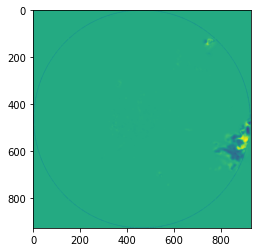

In [ ]:
visulize_output(np.squeeze(y_pred))

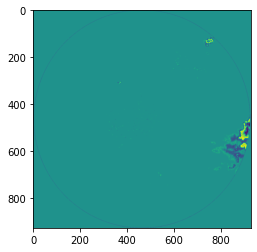

In [ ]:
visulize_output(np.squeeze(y))

In [ ]:
def prediction(model_instance, input_data, lead_time=12):
    
    # input_data = data_preprocessing(input_data)
    X,y = input_data
    nwcst = []

    for _ in range(lead_time):
        # make prediction
        pred = model_instance.predict(X)
        # append prediction to holder
        nwcst.append(pred)
        # append prediction to the input shifted on one step ahead
        X = np.concatenate([X[::, ::, ::, 1:], pred], axis=-1)
    
    nwcst = data_postprocessing(nwcst)
    
    return nwcst

In [ ]:
nwcst = prediction(model,test_rain_dataset[176],lead_time=12)

In [ ]:
nwcst.shape

(12, 928, 928)

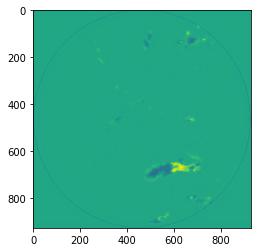

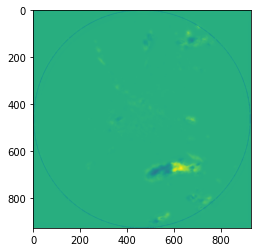

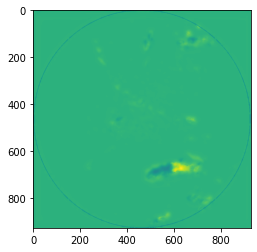

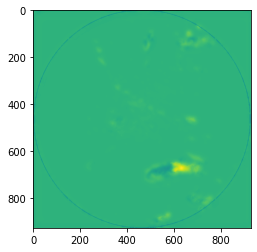

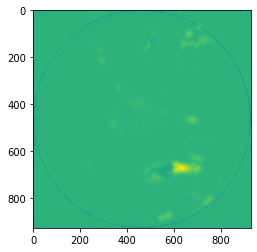

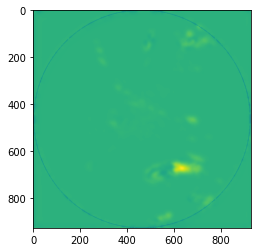

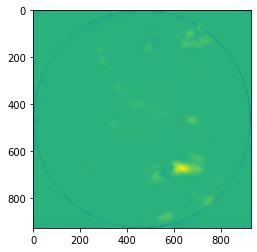

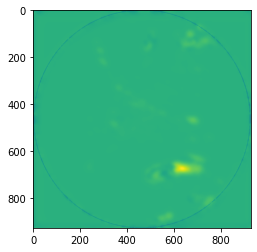

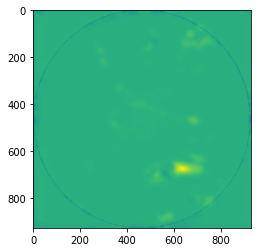

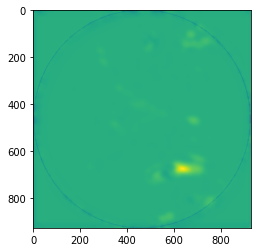

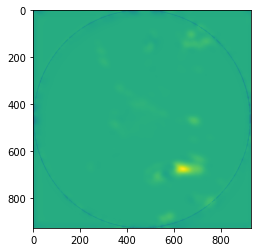

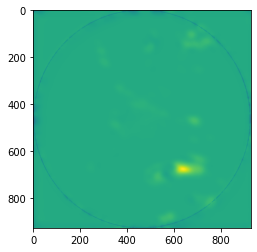

In [ ]:
for i in range(nwcst.shape[0]):
  plt.imshow(nwcst[i])
  plt.show()

In [ ]:
loss = []
for i in range(len(test_rain_dataset)):
  

In [ ]:
K.clear_session()